In [14]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array

In [3]:
model = VGG16(weights='imagenet')

2024-05-13 11:21:21.612041: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-13 11:21:21.672911: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-13 11:21:21.673326: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [24]:
path = '../../00.Data/07.ML/train/'
full_names = os.listdir(path)[:100]
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

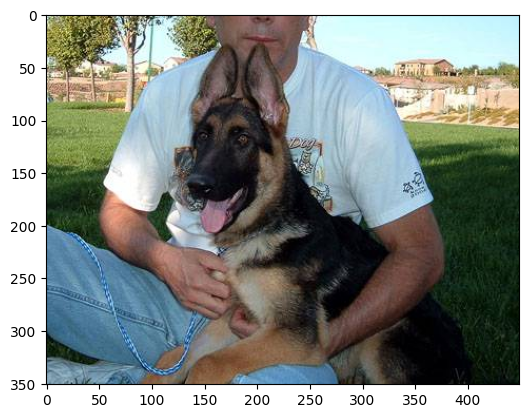

In [49]:
sample = random.choice(full_names)
image = mpimg.imread(path + sample)
plt.imshow(image)
plt.show()

In [50]:
image = cv2.resize(image, dsize=(224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print("%s (%.2f%%)" % (label[1], label[2]*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
German_shepherd (89.88%)


In [51]:
decode_predictions(yhat)

[[('n02106662', 'German_shepherd', 0.8988418),
  ('n02105162', 'malinois', 0.09670365),
  ('n02109047', 'Great_Dane', 0.0017837583),
  ('n02091467', 'Norwegian_elkhound', 0.0008121245),
  ('n02088466', 'bloodhound', 0.0006576873)]]

In [54]:
def resize_and_preprocess_vgg(image) :
    image = cv2.resize(image, dsize=(224, 224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    return preprocess_input(image)

def predict_vgg(model, image) :
    yhat = model.predict(image)
    label = decode_predictions(yhat)
    return label[0][0][1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


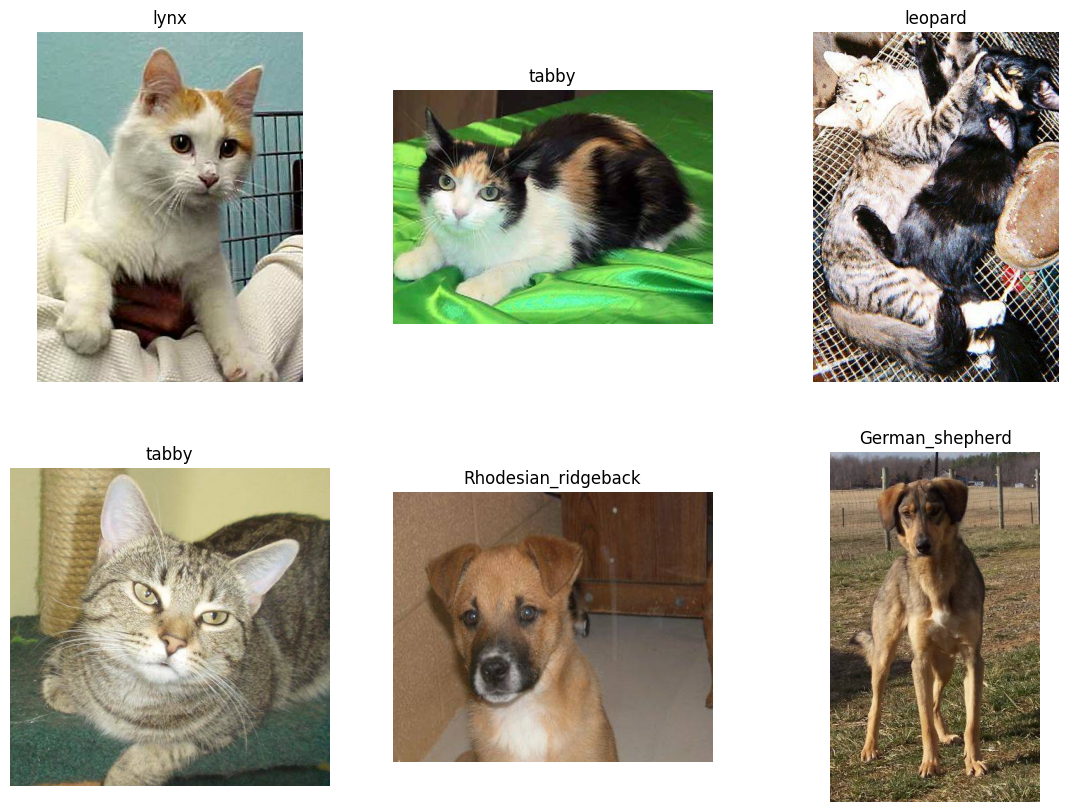

In [59]:
plt.figure(figsize=(14,10))
idx = 1

for each in random.choices(full_names, k=6) :
    image = mpimg.imread(path + each)
    plt.subplot(2, 3, idx)
    idx += 1
    plt.imshow(image)

    image = resize_and_preprocess_vgg(image)
    result = predict_vgg(model, image)

    plt.title(result)
    plt.axis('off')

plt.show()